## Gradient Descent

Gradient Descent is a metric, used to predict the slope and intercept manually, rather how, the machine learning model is predicting the slope and intercept

#### consider a simple prediction function

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]<br>
y = [10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

to predict the value of x(11) it will be 40, 

**The prediction function is** calculated by finding the relation between x and y

In [118]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

**`note`** : *I know the slope and intercept, which is 3 and 7*

so the prediction function for any x is easily calculated.

In [119]:
my_slope = 3
my_intercept = 7

In [120]:
def prediction_function(x):
    return my_slope*x+my_intercept

In [121]:
print(f"The value of y when x was 11 = {prediction_function(11)}")

The value of y when x was 11 = 40


#### relation between x and y in graphical representation 

In [122]:
import matplotlib.pyplot as plt

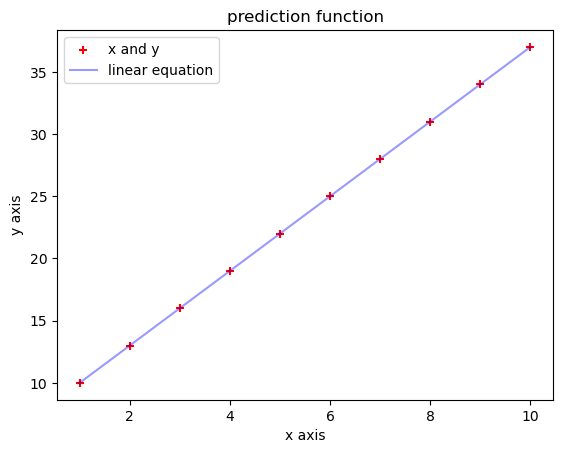

In [123]:
plt.title('prediction function')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.scatter(x, y, color='red', marker='+', label='x and y')
plt.plot(x, y, color='blue', alpha=0.4, label='linear equation')
plt.legend()
plt.show()

## by using machine learning model

In [124]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [125]:
model = LinearRegression()
model.fit(np.array([x]).reshape(-1, 1), np.array([y]).reshape(-1, 1))

LinearRegression()

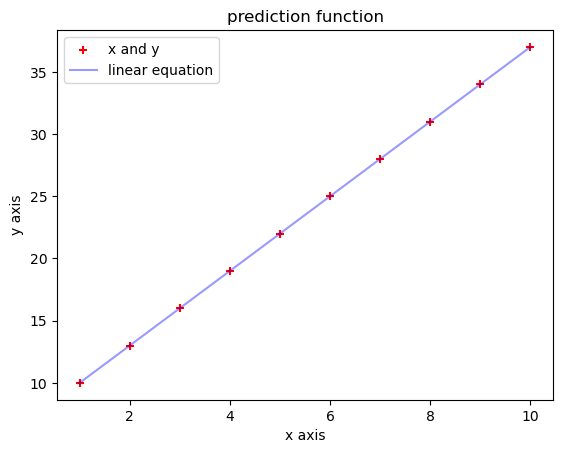

In [126]:
plt.title('prediction function')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.scatter(x, y, color='red', marker='+', label='x and y')
plt.plot(x, model.predict(np.array([x]).reshape(-1, 1)), color='blue', alpha=0.4, label='linear equation')
plt.legend()
plt.show()

In [127]:
value_for_11 = model.predict([[11]])

print(f"The value of y when x was 11 = {value_for_11}")

The value of y when x was 11 = [[40.]]


**`as we know`**, that the machine learning model return the prediction fucntion, which consists of the slope and intercept,


In [128]:
slope = model.coef_
intercept = model.intercept_

print(f"My slope value is {my_slope}")
print(f"My intercept value is {my_intercept}")
print(f"Machine Learning slope is {slope}")
print(f"Machine Learning intercept is {intercept}")

My slope value is 3
My intercept value is 7
Machine Learning slope is [[3.]]
Machine Learning intercept is [7.]


### We Can generate the slope and intercept using gradient descent

*how the machine learning model is generating the slope and intercept*, using the **gradient descent** algorithm.

<div align='center'>
    <img src='images/gradient_descent_graph.png' width=500>
</div>

<h3 style="color: green">Consider the above graph</h3>

<p>
   the relation between slope and intercept with the cost funnction
</p>

derivaties

<p>
    this graph is representation of side view of slope with cost, and intercept with cost funciton 
</p>

<h2 style="color: green">
    derivatives play the major role
</h2>
<br>
<div align='center'>
    <img src='images/derivaties.png' width=500>
</div>

<ul>
    <li>the first derivatie represent the cost function, derivative</li>
    <li>the second derivatie represent the slope derivative</li>
    <li>the third derivative represent the interception </li>
</ul>

<div align='center'>
    <img src='images/learning rate.png' width=500>
</div>
by using this learning rate we can easily predict the slope and interception

<div align='center'>
    <img src='images/lr_implementation.png' width=500>
</div>

# Creating the Gradient Descent Algorith,

In [129]:
x = np.array(x)
y = np.array(y)

print(f"The value of x is {x}")
print(f"The value of y is {y}")

The value of x is [ 1  2  3  4  5  6  7  8  9 10]
The value of y is [10 13 16 19 22 25 28 31 34 37]


In [230]:
def gradient_descent(x, y):
    m_beginning, b_beginning = 0, 0 # at beginning the slope and intercept are set to 0
    m_current, b_current = m_beginning, b_beginning
    learning_rate = 0.008    # learning rate is consist of any value
    iteration = 10000
    n = len(x)
    
    for i in range(iteration):
        y_prediction = m_current*x + b_current
        
        m_derivative = -(2/n)*sum(x*(y-y_prediction))
        b_derivative = -(2/n)*sum(y-y_prediction) 
        cost_function = (1/n)*sum([(val)**2 for val in (y-y_prediction)])   # cost function for error reduction
        
        m_current = m_current - learning_rate*m_derivative
        b_current = b_current - learning_rate*b_derivative
        
        print(f"iteration: {i}; slope: {m_current}; intercept: {b_current}; cost: {cost_function}")
    
    print(f"\nThe Best slope and interception point is..\n")
    print(f"\nslope: {m_current}")
    print(f"interception point: {b_current}")
    
    print(f"\nWhen we round the slope and intercept value, \n")
    
    print(f"\nslope: {round(m_current)}")
    print(f"interception point: {round(b_current)}\n\n")
    
    return round(m_current), round(b_current)

In [231]:
g_slope, g_interception = gradient_descent(x, y)

iteration: 0; slope: 2.464; intercept: 0.376; cost: 626.5
iteration: 1; slope: 3.3770879999999996; intercept: 0.5291520000000001; cost: 93.993376
iteration: 2; slope: 3.714236416; intercept: 0.5995018240000001; cost: 20.50552475238402
iteration: 3; slope: 3.8375106232319998; intercept: 0.6390569902080001; cost: 10.320365075440995
iteration: 4; slope: 3.881367064182784; intercept: 0.6671311435202562; cost: 8.8654908796247
iteration: 5; slope: 3.8957374120164063; intercept: 0.6908967435758471; cost: 8.614929822887483
iteration: 6; slope: 3.8991642527796255; intercept: 0.7130175034211897; cost: 8.53078803113687
iteration: 7; slope: 3.8985335327663115; intercept: 0.7344827691218436; cost: 8.469929414619337
iteration: 8; slope: 3.8964023928995415; intercept: 0.7556600939324587; cost: 8.41261213363253
iteration: 9; slope: 3.8937204306073676; intercept: 0.7766861218543797; cost: 8.356111414707046
iteration: 10; slope: 3.8908402666300437; intercept: 0.7976117460112613; cost: 8.300049288400878


As per my interception point and slope is optained by gradient descent algorithm

In [233]:
print(f"my slope: {my_slope}")
print(f"my interception point: {my_intercept}")

print(f"\nmachine learning slope: {slope}")
print(f"machine learning interception point: {intercept}")

print(f"\ngradient descent slope: {g_slope}")
print(f"gradient descent interception point: {g_interception}")

my slope: 3
my interception point: 7

machine learning slope: [[3.]]
machine learning interception point: [7.]

gradient descent slope: 3
gradient descent interception point: 7


**`note`** : *all this slope values are same,* so the gradient descent algorithm work fine for linear model prediction,

## Graphical representation of gradient descent model working

In [255]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

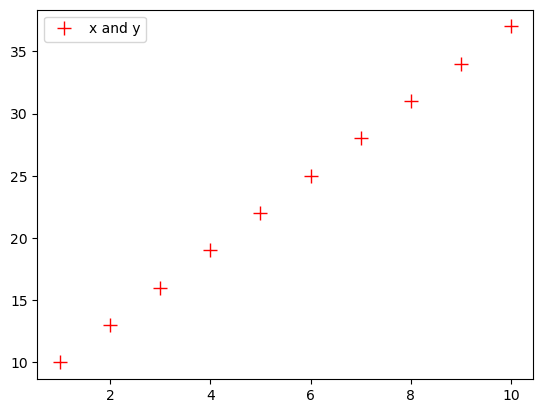

In [260]:
def gradient_descent(x, y):
    m_beginning, b_beginning = 0, 0 
    m_current, b_current = m_beginning, b_beginning
    learning_rate = 0.008   
    iteration = 10000
    n = len(x)
    plt.plot(x, y, color='red', marker='+', markersize=10, label='x and y', linewidth=0)          # plotting the points
    plt.legend()
    for i in range(iteration):
        y_prediction = m_current*x + b_current
        
#         plt.plot(x, y_prediction, color='blue', alpha=0.015, label='GD prediction') # plotting the line for each iteration
        
        m_derivative = -(2/n)*sum(x*(y-y_prediction))
        b_derivative = -(2/n)*sum(y-y_prediction) 
        cost_function = (1/n)*sum([(val)**2 for val in (y-y_prediction)])   
        
        m_current = m_current - learning_rate*m_derivative
        b_current = b_current - learning_rate*b_derivative
    

    
gradient_descent(x, y)

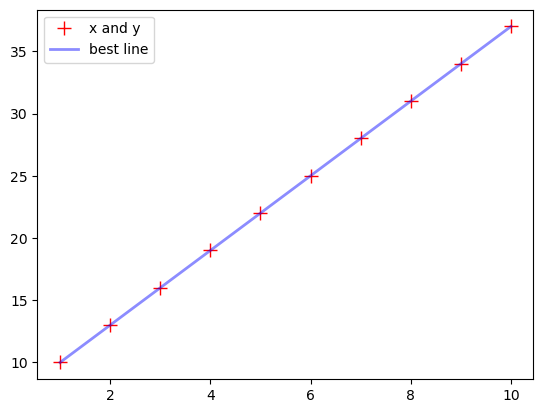

In [264]:
def gradient_descent1(x, y):
    m_beginning, b_beginning = 0, 0 
    m_current, b_current = m_beginning, b_beginning
    learning_rate = 0.008   
    iteration = 10000
    n = len(x)
    plt.plot(x, y, color='red', marker='+', markersize=10, label='x and y', linewidth=0)            # plotting the points
    for i in range(iteration):
        y_prediction = m_current*x + b_current
        
#         plt.plot(x, y_prediction, color='blue', alpha=0.015, label='GD prediction') # plotting the line for each iteration
        
        m_derivative = -(2/n)*sum(x*(y-y_prediction))
        b_derivative = -(2/n)*sum(y-y_prediction) 
        cost_function = (1/n)*sum([(val)**2 for val in (y-y_prediction)])   
        
        m_current = m_current - learning_rate*m_derivative
        b_current = b_current - learning_rate*b_derivative
    

    plt.plot(x, y, color='blue', alpha=0.45, label='best line', linewidth=2)
    plt.legend()
    
gradient_descent1(x, y)

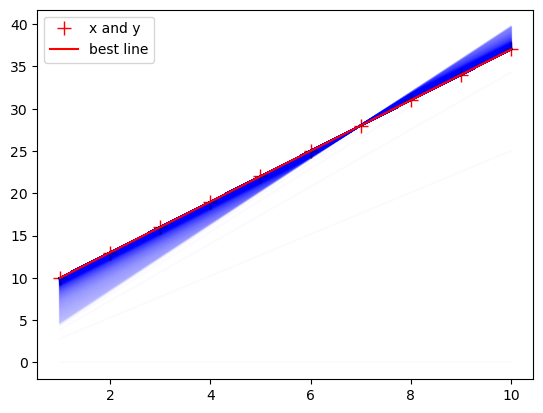

In [271]:
def gradient_descent2(x, y):
    m_beginning, b_beginning = 0, 0 
    m_current, b_current = m_beginning, b_beginning
    learning_rate = 0.008   
    iteration = 10000
    n = len(x)
    plt.plot(x, y, color='red', marker='+', markersize=10, label='x and y', linewidth=0)       # plotting the points
    for i in range(iteration):
        y_prediction = m_current*x + b_current
        
        plt.plot(x, y_prediction, color='blue', alpha=0.015) # plotting the line for each iteration
        
        m_derivative = -(2/n)*sum(x*(y-y_prediction))
        b_derivative = -(2/n)*sum(y-y_prediction) 
        cost_function = (1/n)*sum([(val)**2 for val in (y-y_prediction)])   
        
        m_current = m_current - learning_rate*m_derivative
        b_current = b_current - learning_rate*b_derivative
        
    plt.plot(x, y, color='red', label='best line', linewidth=1.5)
    plt.legend()
    
gradient_descent2(x, y)